<a href="https://colab.research.google.com/github/ClovisMallmann/XP_Projeto_Aplicado/blob/main/Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
!pip install mysql-connector-python
!apt-get -y install mysql-server
!service mysql start


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mysql-server is already the newest version (8.0.35-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
 * Starting MySQL database server mysqld
   ...done.


In [215]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

ERROR 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)


In [216]:
import mysql.connector

# Create a connection to the MySQL server
conn = mysql.connector.connect(user='root', password='root', host='localhost')

# Create a cursor to interact with the MySQL server
cursor = conn.cursor()

# **1 - Criando o BD "Base_dados"**

In [217]:
# Create a new database named 'Base_dados'
cursor.execute("CREATE DATABASE IF NOT EXISTS Base_dados")

# Switch to the 'Base_dados' database
cursor.execute("USE Base_dados")



***1.1 - Criar tab_clientes***

In [218]:
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

cursor.execute('''
DROP TABLE IF EXISTS `tab_clientes`;

CREATE TABLE `tab_clientes` (
  `id` mediumint(8) unsigned NOT NULL auto_increment,
  `Cliente_id` mediumint,
  `Nome` varchar(255) default NULL,
  `Idade` mediumint default NULL,
  `Uf` varchar(50) default NULL,
  `Escolaridade` TEXT default NULL,
  `Renda` mediumint default NULL,
  `Civil` TEXT default NULL,
  PRIMARY KEY (`id`)
) AUTO_INCREMENT=1;
''')



In [219]:
#Dados aleatórios para popular a tabela clientes
inserir_clientes = [
    (1,"Roth May",82,"RS","Medio",6515,"Separado"),
  (2,"Sharon Hebert",70,"PE","Medio",5943,"Separado"),
  (3,"Felix Cochran",73,"PR","Medio",6264,"Casado"),
  (4,"Xanthus Schwartz",71,"GO","Medio",4062,"Solteiro"),
  (5,"Vielka Mcintosh",61,"GO","Medio",8316,"Viuvo"),
  (6,"Ivor Alvarez",60,"PR","Primario",4379,"Casado"),
  (7,"Jordan Mcdonald",78,"SP","Medio",4740,"Casado"),
  (8,"Denton Cochran",80,"SC","Medio",4569,"Casado"),
  (9,"Caesar Hardin",95,"CE","Medio",7315,"Viuvo"),
  (10,"Jack Dotson",90,"MA","Primario",2985,"Separado"),
  (11,"Clark Head",98,"BA","Superior",4370,"Separado"),
  (12,"Sage Schmidt",61,"CE","Primario",5987,"Separado"),
  (13,"Castor Robbins",89,"PB","Superior",6707,"Casado"),
  (14,"Drake Frank",95,"PB","Medio",6091,"Casado"),
  (15,"Jordan Berry",94,"SC","Medio",7184,"Casado"),
  (16,"Dawn Knight",93,"CE","Primario",6481,"Casado"),
  (17,"Savannah Branch",86,"SP","Primario",5874,"Solteiro"),
  (18,"Declan Cruz",78,"PA","Medio",8040,"Separado"),
  (19,"Leilani Mcdaniel",64,"PA","Primario",7294,"Viuvo"),
  (20,"Zachary Cannon",78,"RJ","Medio",4741,"Casado"),
  (21,"Rhea Deleon",89,"CE","Superior",4645,"Viuvo"),
  (22,"Boris Yang",72,"SP","Medio",7487,"Solteiro"),
  (23,"Kai Watts",93,"SC","Medio",7380,"Casado"),
  (24,"Ori Hartman",65,"MA","Medio",8507,"Casado"),
  (25,"Jayme Downs",98,"CE","Medio",4432,"Separado"),
  (26,"Castor Roberts",91,"PB","Superior",8241,"Solteiro"),
  (27,"Kato Bass",95,"MA","Superior",4811,"Casado"),
  (28,"Gil Singleton",70,"PB","Medio",4158,"Separado"),
  (29,"Vaughan Joyner",72,"RJ","Superior",4855,"Solteiro"),
  (30,"Zenaida Myers",68,"PB","Primario",3829,"Solteiro"),
  (31,"Conan Flores",61,"SP","Medio",7590,"Separado"),
  (32,"Fritz Becker",74,"BA","Primario",6931,"Solteiro"),
  (33,"Rahim Lang",98,"RS","Medio",4008,"Separado"),
  (34,"Ahmed Rowland",78,"RJ","Superior",8378,"Viuvo"),
  (35,"Vaughan Case",86,"RJ","Primario",6351,"Solteiro"),
  (36,"Jared Wallace",69,"PE","Primario",6336,"Separado"),
  (37,"Carla Vance",97,"PB","Primario",7792,"Casado"),
  (38,"Cody Marquez",67,"MG","Primario",7120,"Solteiro"),
  (39,"Allegra Hull",68,"RJ","Primario",7835,"Casado"),
  (40,"Palmer Nolan",92,"BA","Medio",2591,"Casado"),
  (41,"Aaron Dawson",82,"SP","Medio",3278,"Casado"),
  (42,"Jelani Hopkins",68,"CE","Primario",4755,"Viuvo"),
  (43,"Nehru Chan",90,"SC","Medio",3667,"Casado"),
  (44,"Marshall Miles",72,"PB","Medio",4258,"Solteiro"),
  (45,"Dalton Wilkins",96,"CE","Primario",7799,"Casado"),
  (46,"Graham Wong",60,"RJ","Medio",4451,"Casado"),
  (47,"Drew Mckay",79,"BA","Primario",8552,"Casado"),
  (48,"Sean Wilder",64,"BA","Primario",4922,"Casado"),
  (49,"Wang Butler",61,"CE","Superior",8792,"Separado"),
  (50,"Uriel Jarvis",83,"MG","Primario",7478,"Casado"),
  (51,"Whilemina Dillon",77,"PE","Medio",4533,"Casado"),
  (52,"Hannah Yang",63,"BA","Primario",8469,"Casado"),
  (53,"Stacey Mccray",81,"MA","Primario",8416,"Separado"),
  (54,"Raphael Thomas",75,"PR","Medio",4700,"Viuvo"),
  (55,"Risa Peck",91,"MG","Superior",3324,"Separado"),
  (56,"Rashad Hinton",69,"RJ","Superior",8335,"Viuvo"),
  (57,"Brandon Kaufman",94,"PA","Primario",8539,"Casado"),
  (58,"Herman Fisher",66,"RS","Primario",8446,"Viuvo"),
  (59,"Hedwig O'donnell",62,"PB","Medio",7533,"Separado"),
  (60,"Plato Lloyd",78,"MA","Superior",7039,"Separado"),
  (61,"Evangeline Shannon",74,"PR","Medio",8935,"Separado"),
  (62,"Levi Macdonald",70,"MA","Medio",3679,"Casado"),
  (63,"Dora Knowles",62,"PE","Medio",8193,"Separado"),
  (64,"Eagan Mcbride",82,"GO","Medio",8321,"Casado"),
  (65,"Gillian Guerrero",78,"CE","Medio",3914,"Separado"),
  (66,"Chava Schroeder",89,"PA","Superior",3533,"Separado"),
  (67,"Hilda Donaldson",62,"RS","Medio",3449,"Casado"),
  (68,"Leigh Hancock",70,"BA","Superior",8604,"Solteiro"),
  (69,"Jennifer Camacho",88,"SP","Primario",5464,"Separado"),
  (70,"Hayfa Foster",66,"GO","Superior",4887,"Separado"),
  (71,"Jerome Welch",86,"RJ","Superior",8252,"Solteiro"),
  (72,"Roth Hoffman",70,"GO","Primario",4012,"Viuvo"),
  (73,"Hoyt Weber",61,"PB","Medio",5943,"Casado"),
  (74,"Martina Bowman",94,"PB","Primario",4889,"Viuvo"),
  (75,"Frances Freeman",71,"PE","Medio",4568,"Casado"),
  (76,"Scott Castro",64,"GO","Primario",7870,"Viuvo"),
  (77,"Kylie Harvey",73,"PE","Superior",8403,"Casado"),
  (78,"Lyle Odom",95,"MA","Medio",8826,"Viuvo"),
  (79,"Isadora Griffin",78,"MG","Primario",4513,"Solteiro"),
  (80,"Angelica Stevens",74,"MG","Superior",4772,"Casado"),
  (81,"Erica Gibbs",84,"CE","Primario",3480,"Separado"),
  (82,"Julian Dean",82,"MG","Primario",5250,"Casado"),
  (83,"Leandra Huffman",62,"SP","Primario",3607,"Casado"),
  (84,"Lee Soto",67,"BA","Superior",2932,"Casado"),
  (85,"Grant Boyer",68,"BA","Medio",3564,"Separado"),
  (86,"Jocelyn Wynn",82,"MG","Superior",4480,"Separado"),
  (87,"Luke Cole",63,"MG","Medio",4364,"Separado"),
  (88,"Harper Bryan",81,"SP","Primario",5435,"Casado"),
  (89,"Alexander Mclean",88,"RS","Medio",8392,"Solteiro"),
  (90,"Daryl Petty",60,"MA","Medio",2609,"Solteiro"),
  (91,"Kelsie Bowers",64,"CE","Medio",4501,"Solteiro"),
  (92,"Celeste Gates",66,"PA","Superior",3996,"Solteiro"),
  (93,"Ramona Rosario",72,"PE","Medio",2569,"Viuvo"),
  (94,"Allen Harrison",90,"SP","Medio",3832,"Casado"),
  (95,"Shelby Cash",81,"PB","Medio",5712,"Casado"),
  (96,"Aquila Michael",90,"RJ","Medio",6149,"Separado"),
  (97,"Natalie Cole",95,"PE","Superior",4169,"Separado"),
  (98,"Hamilton Hunter",79,"MG","Superior",4113,"Casado"),
  (99,"Ava Lynch",73,"GO","Primario",5362,"Solteiro"),
  (100,"Minerva Alford",85,"PE","Superior",3764,"Solteiro")
]


In [220]:
#POVOAMENTO DA TABELA

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Inserindo os dados na tabela criada tab_clientes
query = "INSERT INTO tab_clientes (Cliente_id, Nome, Idade, Uf, Escolaridade, Renda, Civil) VALUES ( %s, %s,%s, %s, %s,%s, %s)"

for registro in inserir_clientes:
  cursor.execute(query, registro)

conn.commit()

cursor.close()
conn.close()

In [221]:
#VERIFICAÇÃO DOS DADOS INSERIDOS

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Verificando os dados com uma query.
cursor.execute("SELECT * FROM tab_clientes")

# Buscando todos os dados e passando para variavel "records"
records = cursor.fetchall()

#Apresentando o que foi gravado
for record in records:
    print(record)

cursor.close()
conn.close()

(1, 1, 'Roth May', 82, 'RS', 'Medio', 6515, 'Separado')
(2, 2, 'Sharon Hebert', 70, 'PE', 'Medio', 5943, 'Separado')
(3, 3, 'Felix Cochran', 73, 'PR', 'Medio', 6264, 'Casado')
(4, 4, 'Xanthus Schwartz', 71, 'GO', 'Medio', 4062, 'Solteiro')
(5, 5, 'Vielka Mcintosh', 61, 'GO', 'Medio', 8316, 'Viuvo')
(6, 6, 'Ivor Alvarez', 60, 'PR', 'Primario', 4379, 'Casado')
(7, 7, 'Jordan Mcdonald', 78, 'SP', 'Medio', 4740, 'Casado')
(8, 8, 'Denton Cochran', 80, 'SC', 'Medio', 4569, 'Casado')
(9, 9, 'Caesar Hardin', 95, 'CE', 'Medio', 7315, 'Viuvo')
(10, 10, 'Jack Dotson', 90, 'MA', 'Primario', 2985, 'Separado')
(11, 11, 'Clark Head', 98, 'BA', 'Superior', 4370, 'Separado')
(12, 12, 'Sage Schmidt', 61, 'CE', 'Primario', 5987, 'Separado')
(13, 13, 'Castor Robbins', 89, 'PB', 'Superior', 6707, 'Casado')
(14, 14, 'Drake Frank', 95, 'PB', 'Medio', 6091, 'Casado')
(15, 15, 'Jordan Berry', 94, 'SC', 'Medio', 7184, 'Casado')
(16, 16, 'Dawn Knight', 93, 'CE', 'Primario', 6481, 'Casado')
(17, 17, 'Savannah Bra

***1.2 - Criar a tabela Remedios***

In [222]:

# Conectando
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Cursor de interação
cursor = conn.cursor()

# Criar a tabela  'remedios'
cursor.execute('''
DROP TABLE IF EXISTS `tab_remedios`;

CREATE TABLE `tab_remedios` (
  `id` mediumint(8) unsigned NOT NULL auto_increment,
  `Cliente_id` mediumint,
  `Remedio` TEXT default NULL,
  PRIMARY KEY (`id`)
) AUTO_INCREMENT=1;
''')


In [223]:
#Dados aleatórios para popular a tabela clientes
inserir_remedios = [
    (1,"Azitromicina Cefalexina Losartana Alprazolam"),
  (2,"Azitromicina Cefalexina Losartana"),
  (3,"Azitromicina"),
  (4,"Azitromicina Cefalexina Losartana Alprazolam"),
  (5,"Azitromicina Cefalexina"),
  (6,"Azitromicina"),
  (7,"Azitromicina Cefalexina Losartana Alprazolam"),
  (8,"Azitromicina Cefalexina"),
  (9,"Azitromicina Cefalexina"),
  (10,"Azitromicina Cefalexina Losartana Alprazolam"),
  (11,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (12,"Azitromicina Cefalexina"),
  (13,"Azitromicina Cefalexina Losartana"),
  (14,"Azitromicina"),
  (15,"Azitromicina Cefalexina"),
  (16,"Azitromicina Cefalexina Losartana"),
  (17,"Azitromicina Cefalexina Losartana Alprazolam"),
  (18,"Azitromicina Cefalexina"),
  (19,"Azitromicina Cefalexina"),
  (20,"Azitromicina"),
  (21,"Azitromicina Cefalexina"),
  (22,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (23,"Azitromicina Cefalexina Losartana Alprazolam"),
  (24,"Azitromicina Cefalexina"),
  (25,"Azitromicina Cefalexina"),
  (26,"Azitromicina Cefalexina"),
  (27,"Azitromicina Cefalexina"),
  (28,"Azitromicina Cefalexina Losartana Alprazolam"),
  (29,"Azitromicina Cefalexina"),
  (30,"Azitromicina Cefalexina Losartana"),
  (31,"Azitromicina Cefalexina Losartana Alprazolam"),
  (32,"Azitromicina Cefalexina Losartana"),
  (33,"Azitromicina Cefalexina Losartana Alprazolam"),
  (34,"Azitromicina Cefalexina"),
  (35,"Azitromicina Cefalexina Losartana Alprazolam"),
  (36,"Azitromicina Cefalexina Losartana Alprazolam"),
  (37,"Azitromicina"),
  (38,"Azitromicina Cefalexina Losartana"),
  (39,"Azitromicina Cefalexina"),
  (40,"Azitromicina"),
  (41,"Azitromicina Cefalexina"),
  (42,"Azitromicina Cefalexina Losartana Alprazolam"),
  (43,"Azitromicina Cefalexina Losartana"),
  (44,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (45,"Azitromicina"),
  (46,"Azitromicina Cefalexina Losartana"),
  (47,"Azitromicina"),
  (48,"Azitromicina Cefalexina Losartana Alprazolam"),
  (49,"Azitromicina Cefalexina"),
  (50,"Azitromicina"),
  (51,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (52,"Azitromicina Cefalexina Losartana Alprazolam"),
  (53,"Azitromicina Cefalexina"),
  (54,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (55,"Azitromicina"),
  (56,"Azitromicina Cefalexina Losartana"),
  (57,"Azitromicina Cefalexina Losartana Alprazolam"),
  (58,"Azitromicina Cefalexina Losartana Alprazolam"),
  (59,"Azitromicina Cefalexina"),
  (60,"Azitromicina Cefalexina Losartana Alprazolam"),
  (61,"Azitromicina Cefalexina Losartana Alprazolam"),
  (62,"Azitromicina Cefalexina Losartana Alprazolam"),
  (63,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (64,"Azitromicina Cefalexina"),
  (65,"Azitromicina Cefalexina Losartana"),
  (66,"Azitromicina Cefalexina"),
  (67,"Azitromicina Cefalexina"),
  (68,"Azitromicina Cefalexina Losartana"),
  (69,"Azitromicina"),
  (70,"Azitromicina Cefalexina Losartana"),
  (71,"Azitromicina"),
  (72,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (73,"Azitromicina Cefalexina Losartana Alprazolam"),
  (74,"Azitromicina Cefalexina Losartana Alprazolam"),
  (75,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (76,"Azitromicina Cefalexina"),
  (77,"Azitromicina Cefalexina Losartana"),
  (78,"Azitromicina Cefalexina"),
  (79,"Azitromicina Cefalexina"),
  (80,"Azitromicina Cefalexina Losartana"),
  (81,"Azitromicina Cefalexina"),
  (82,"Azitromicina Cefalexina Losartana Alprazolam"),
  (83,"Azitromicina Cefalexina Losartana Alprazolam"),
  (84,"Azitromicina Cefalexina Losartana Alprazolam"),
  (85,"Azitromicina Cefalexina Losartana Alprazolam"),
  (86,"Azitromicina Cefalexina"),
  (87,"Azitromicina Cefalexina Losartana Alprazolam"),
  (88,"Azitromicina Cefalexina"),
  (89,"Azitromicina Cefalexina Losartana Alprazolam"),
  (90,"Azitromicina Cefalexina Losartana Alprazolam"),
  (91,"Azitromicina Cefalexina Losartana"),
  (92,"Azitromicina Cefalexina"),
  (93,"Azitromicina Cefalexina"),
  (94,"Azitromicina Cefalexina Losartana"),
  (95,"Azitromicina Cefalexina Losartana Alprazolam"),
  (96,"Azitromicina Cefalexina Losartana"),
  (97,"Azitromicina"),
  (98,"Azitromicina Cefalexina Losartana Alprazolam Sinvastatina"),
  (99,"Azitromicina Cefalexina Losartana Alprazolam"),
  (100,"Azitromicina Cefalexina Losartana Alprazolam")
]

In [224]:
#POVOAMENTO DA TABELA

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

 #Inserindo os dados na tabela criada tab_sintomas
query = "INSERT INTO tab_remedios (Cliente_id, Remedio) VALUES ( %s,%s)"

for registro in inserir_remedios:
  cursor.execute(query, registro)

conn.commit()

cursor.close()
conn.close()

In [225]:
#VERIFICAÇÃO DOS DADOS INSERIDOS

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Verificando os dados com uma query.
cursor.execute("SELECT * FROM tab_remedios")

# Buscando todos os dados e passando para variavel "records"
records = cursor.fetchall()

#Apresentando o que foi gravado
for record in records:
    print(record)

cursor.close()
conn.close()

(1, 1, 'Azitromicina Cefalexina Losartana Alprazolam')
(2, 2, 'Azitromicina Cefalexina Losartana')
(3, 3, 'Azitromicina')
(4, 4, 'Azitromicina Cefalexina Losartana Alprazolam')
(5, 5, 'Azitromicina Cefalexina')
(6, 6, 'Azitromicina')
(7, 7, 'Azitromicina Cefalexina Losartana Alprazolam')
(8, 8, 'Azitromicina Cefalexina')
(9, 9, 'Azitromicina Cefalexina')
(10, 10, 'Azitromicina Cefalexina Losartana Alprazolam')
(11, 11, 'Azitromicina Cefalexina Losartana Alprazolam Sinvastatina')
(12, 12, 'Azitromicina Cefalexina')
(13, 13, 'Azitromicina Cefalexina Losartana')
(14, 14, 'Azitromicina')
(15, 15, 'Azitromicina Cefalexina')
(16, 16, 'Azitromicina Cefalexina Losartana')
(17, 17, 'Azitromicina Cefalexina Losartana Alprazolam')
(18, 18, 'Azitromicina Cefalexina')
(19, 19, 'Azitromicina Cefalexina')
(20, 20, 'Azitromicina')
(21, 21, 'Azitromicina Cefalexina')
(22, 22, 'Azitromicina Cefalexina Losartana Alprazolam Sinvastatina')
(23, 23, 'Azitromicina Cefalexina Losartana Alprazolam')
(24, 24, '

***1.3 - Criar a tabela sintomas***

In [226]:
# Conectando
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Cursor de interação
cursor = conn.cursor()

# Criar a tabela  'Sintomas'
cursor.execute('''
DROP TABLE IF EXISTS `tab_sintomas`;

CREATE TABLE `tab_sintomas` (
  `id` mediumint(8) unsigned NOT NULL auto_increment,
  `Sintoma` TEXT default NULL,
  `Data` varchar(255),
  `Cliente_id` mediumint default NULL,
  PRIMARY KEY (`id`)
) AUTO_INCREMENT=1;
''')


In [227]:
#Dados aleatórios para popular a tabela sintomas
inserir_sintomas = [
    ("Normal","2022-09-07",80),
  ("Lapsos_de_memoria","2023-03-29",5),
  ("Incontinencia_urinaria","2023-05-15",47),
  ("Insonia","2022-11-29",92),
  ("Agressividade","2022-10-17",85),
  ("Insonia","2021-07-10",28),
  ("Lapsos_de_memoria","2022-07-26",37),
  ("Agressividade","2022-03-21",57),
  ("Lapsos_de_memoria","2023-01-01",45),
  ("Lapsos_de_memoria","2022-08-12",36),
  ("Agressividade","2022-04-24",8),
  ("Vomito","2023-03-08",94),
  ("Agressividade","2021-05-27",58),
  ("Lapsos_de_memoria","2021-12-02",26),
  ("Lapsos_de_memoria","2021-12-07",43),
  ("Lapsos_de_memoria","2021-11-23",34),
  ("Agressividade","2022-10-02",61),
  ("Agressividade","2021-06-17",34),
  ("Quedas_de_pressao","2023-03-18",45),
  ("Agressividade","2023-09-30",96),
  ("Insonia","2021-01-15",34),
  ("Lapsos_de_memoria","2022-11-08",80),
  ("Insonia","2021-12-17",80),
  ("Vomito","2021-08-07",42),
  ("Incontinencia_urinaria","2022-03-15",96),
  ("Vomito","2021-01-07",48),
  ("Vomito","2022-10-08",49),
  ("Vomito","2022-10-25",36),
  ("Lapsos_de_memoria","2022-08-24",95),
  ("Insonia","2022-02-19",54),
  ("Insonia","2021-01-17",41),
  ("Quedas_de_pressao","2021-01-18",2),
  ("Lapsos_de_memoria","2022-07-04",6),
  ("Incontinencia_urinaria","2022-12-06",32),
  ("Agressividade","2022-12-06",59),
  ("Insonia","2022-07-23",71),
  ("Incontinencia_urinaria","2022-06-17",80),
  ("Insonia","2021-02-10",45),
  ("Lapsos_de_memoria","2021-05-13",90),
  ("Agressividade","2022-09-09",58),
  ("Agressividade","2021-08-06",54),
  ("Lapsos_de_memoria","2023-08-17",98),
  ("Incontinencia_urinaria","2022-11-23",42),
  ("Quedas_de_pressao","2023-01-13",2),
  ("Lapsos_de_memoria","2023-04-02",28),
  ("Lapsos_de_memoria","2021-06-04",86),
  ("Normal","2023-08-30",51),
  ("Lapsos_de_memoria","2022-05-15",92),
  ("Insonia","2022-08-11",88),
  ("Insonia","2023-08-14",88),
  ("Vomito","2023-03-29",2),
  ("Agressividade","2023-09-06",30),
  ("Agressividade","2023-07-26",52),
  ("Insonia","2023-07-04",6),
  ("Vomito","2021-07-07",21),
  ("Insonia","2023-10-12",24),
  ("Agressividade","2022-08-05",61),
  ("Incontinencia_urinaria","2021-01-19",32),
  ("Insonia","2022-09-07",60),
  ("Lapsos_de_memoria","2022-01-07",67),
  ("Quedas_de_pressao","2023-05-29",33),
  ("Insonia","2022-02-12",20),
  ("Lapsos_de_memoria","2021-09-25",18),
  ("Quedas_de_pressao","2021-08-01",4),
  ("Quedas_de_pressao","2022-11-29",89),
  ("Normal","2021-08-31",67),
  ("Normal","2023-03-15",18),
  ("Normal","2021-08-22",83),
  ("Insonia","2021-12-29",6),
  ("Quedas_de_pressao","2022-01-03",32),
  ("Agressividade","2022-03-15",39),
  ("Incontinencia_urinaria","2022-04-11",8),
  ("Agressividade","2022-07-24",81),
  ("Lapsos_de_memoria","2022-07-16",53),
  ("Incontinencia_urinaria","2023-03-15",15),
  ("Agressividade","2023-03-07",66),
  ("Agressividade","2021-06-14",55),
  ("Insonia","2023-03-01",33),
  ("Incontinencia_urinaria","2023-02-04",1),
  ("Vomito","2022-08-03",10),
  ("Vomito","2022-06-19",7),
  ("Normal","2023-10-28",65),
  ("Insonia","2023-02-27",17),
  ("Agressividade","2021-07-30",45),
  ("Incontinencia_urinaria","2022-01-18",45),
  ("Agressividade","2021-03-09",53),
  ("Vomito","2021-05-04",44),
  ("Incontinencia_urinaria","2021-12-12",70),
  ("Vomito","2021-04-05",54),
  ("Agressividade","2022-07-23",82),
  ("Lapsos_de_memoria","2023-04-15",6),
  ("Quedas_de_pressao","2023-02-17",53),
  ("Agressividade","2021-05-04",46),
  ("Lapsos_de_memoria","2022-05-10",91),
  ("Vomito","2023-05-07",71),
  ("Lapsos_de_memoria","2022-10-22",47),
  ("Insonia","2022-01-04",53),
  ("Vomito","2023-04-10",49),
  ("Lapsos_de_memoria","2023-07-09",50),
  ("Lapsos_de_memoria","2022-09-09",92)
]

In [228]:
#POVOAMENTO DA TABELA

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

 #Inserindo os dados na tabela criada tab_sintomas
query = "INSERT INTO tab_sintomas (Sintoma, Data, Cliente_id) VALUES ( %s,%s, %s)"

for registro in inserir_sintomas:
  cursor.execute(query, registro)


# Commit the changes
conn.commit()

cursor.close()
conn.close()

In [229]:
#VERIFICAÇÃO DOS DADOS INSERIDOS

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')
cursor = conn.cursor()

# Verificando os dados com uma query.
cursor.execute("SELECT * FROM tab_sintomas")

# Buscando todos os dados e passando para variavel "records"
records = cursor.fetchall()

#Apresentando o que foi gravado
for record in records:
    print(record)

cursor.close()
conn.close()

(1, 'Normal', '2022-09-07', 80)
(2, 'Lapsos_de_memoria', '2023-03-29', 5)
(3, 'Incontinencia_urinaria', '2023-05-15', 47)
(4, 'Insonia', '2022-11-29', 92)
(5, 'Agressividade', '2022-10-17', 85)
(6, 'Insonia', '2021-07-10', 28)
(7, 'Lapsos_de_memoria', '2022-07-26', 37)
(8, 'Agressividade', '2022-03-21', 57)
(9, 'Lapsos_de_memoria', '2023-01-01', 45)
(10, 'Lapsos_de_memoria', '2022-08-12', 36)
(11, 'Agressividade', '2022-04-24', 8)
(12, 'Vomito', '2023-03-08', 94)
(13, 'Agressividade', '2021-05-27', 58)
(14, 'Lapsos_de_memoria', '2021-12-02', 26)
(15, 'Lapsos_de_memoria', '2021-12-07', 43)
(16, 'Lapsos_de_memoria', '2021-11-23', 34)
(17, 'Agressividade', '2022-10-02', 61)
(18, 'Agressividade', '2021-06-17', 34)
(19, 'Quedas_de_pressao', '2023-03-18', 45)
(20, 'Agressividade', '2023-09-30', 96)
(21, 'Insonia', '2021-01-15', 34)
(22, 'Lapsos_de_memoria', '2022-11-08', 80)
(23, 'Insonia', '2021-12-17', 80)
(24, 'Vomito', '2021-08-07', 42)
(25, 'Incontinencia_urinaria', '2022-03-15', 96)
(2

# **2 - Transformar o Banco de dados em CSV**

In [230]:
#Importando bibliotecas

from mysql.connector import Error
import pandas as pd


***Conexão com o Banco de Dados Mysql***

In [231]:

#Função para criar consultas

def executa_query(conn, query):
    cursor = conn.cursor()
    try:
        cursor.execute(query)
        print("Consulta feita com sucesso")
    except Error as err:
        print(f"Erro: '{err}'")

#Função para ler dados
def ler_query(conn, query):
    cursor = conn.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

***2.1 - Importação e tratamento da tabela clientes***

In [232]:
tab_clientes = """
SELECT *
FROM tab_clientes;
"""

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')

results = ler_query(conn, tab_clientes)

#Tranformando a query em dataframe
df_clientes = pd.DataFrame(results)
df_clientes.head(10)

,0,1,2,3,4,5,6,7
0,1,1,Roth May,82,RS,Medio,6515,Separado
1,2,2,Sharon Hebert,70,PE,Medio,5943,Separado
2,3,3,Felix Cochran,73,PR,Medio,6264,Casado
3,4,4,Xanthus Schwartz,71,GO,Medio,4062,Solteiro
4,5,5,Vielka Mcintosh,61,GO,Medio,8316,Viuvo
5,6,6,Ivor Alvarez,60,PR,Primario,4379,Casado
6,7,7,Jordan Mcdonald,78,SP,Medio,4740,Casado
7,8,8,Denton Cochran,80,SC,Medio,4569,Casado
8,9,9,Caesar Hardin,95,CE,Medio,7315,Viuvo
9,10,10,Jack Dotson,90,MA,Primario,2985,Separado


In [233]:
#Alterando o nome das colunas
df_clientes.columns =['id','Cliente_id','Nome','idade','Uf','Escolaridade','Renda','Civil']

#Verificando
df_clientes

,id,Cliente_id,Nome,idade,Uf,Escolaridade,Renda,Civil
0,1,1,Roth May,82,RS,Medio,6515,Separado
1,2,2,Sharon Hebert,70,PE,Medio,5943,Separado
2,3,3,Felix Cochran,73,PR,Medio,6264,Casado
3,4,4,Xanthus Schwartz,71,GO,Medio,4062,Solteiro
4,5,5,Vielka Mcintosh,61,GO,Medio,8316,Viuvo
...,...,...,...,...,...,...,...,...
95,96,96,Aquila Michael,90,RJ,Medio,6149,Separado
96,97,97,Natalie Cole,95,PE,Superior,4169,Separado
97,98,98,Hamilton Hunter,79,MG,Superior,4113,Casado
98,99,99,Ava Lynch,73,GO,Primario,5362,Solteiro


***2.2 - Importação e tratamento da tabela Remedios***

In [234]:
tab_remedios = """
SELECT *
FROM tab_remedios;
"""

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')

results = ler_query(conn, tab_remedios)

#Tranformando a query em dataframe
df_remedios = pd.DataFrame(results)
df_remedios.head(10)

,0,1,2
0,1,1,Azitromicina Cefalexina Losartana Alprazolam
1,2,2,Azitromicina Cefalexina Losartana
2,3,3,Azitromicina
3,4,4,Azitromicina Cefalexina Losartana Alprazolam
4,5,5,Azitromicina Cefalexina
5,6,6,Azitromicina
6,7,7,Azitromicina Cefalexina Losartana Alprazolam
7,8,8,Azitromicina Cefalexina
8,9,9,Azitromicina Cefalexina
9,10,10,Azitromicina Cefalexina Losartana Alprazolam


In [235]:
#Alterando as colunas
df_remedios.columns =['id','Cliente_id','Remedios']


In [236]:
df_remedios.head(10)

,id,Cliente_id,Remedios
0,1,1,Azitromicina Cefalexina Losartana Alprazolam
1,2,2,Azitromicina Cefalexina Losartana
2,3,3,Azitromicina
3,4,4,Azitromicina Cefalexina Losartana Alprazolam
4,5,5,Azitromicina Cefalexina
5,6,6,Azitromicina
6,7,7,Azitromicina Cefalexina Losartana Alprazolam
7,8,8,Azitromicina Cefalexina
8,9,9,Azitromicina Cefalexina
9,10,10,Azitromicina Cefalexina Losartana Alprazolam


In [237]:
df_remedios.convert_dtypes()


,id,Cliente_id,Remedios
0,1,1,Azitromicina Cefalexina Losartana Alprazolam
1,2,2,Azitromicina Cefalexina Losartana
2,3,3,Azitromicina
3,4,4,Azitromicina Cefalexina Losartana Alprazolam
4,5,5,Azitromicina Cefalexina
...,...,...,...
95,96,96,Azitromicina Cefalexina Losartana
96,97,97,Azitromicina
97,98,98,Azitromicina Cefalexina Losartana Alprazolam S...
98,99,99,Azitromicina Cefalexina Losartana Alprazolam


In [238]:
#Coluna remedios para Texto
df_remedios['Remedios'] = df_remedios['Remedios'].astype(str)

In [239]:
df_remedios.head(10)

,id,Cliente_id,Remedios
0,1,1,Azitromicina Cefalexina Losartana Alprazolam
1,2,2,Azitromicina Cefalexina Losartana
2,3,3,Azitromicina
3,4,4,Azitromicina Cefalexina Losartana Alprazolam
4,5,5,Azitromicina Cefalexina
5,6,6,Azitromicina
6,7,7,Azitromicina Cefalexina Losartana Alprazolam
7,8,8,Azitromicina Cefalexina
8,9,9,Azitromicina Cefalexina
9,10,10,Azitromicina Cefalexina Losartana Alprazolam


***2.3 - Importando e tratando a tabela Sintomas***

In [240]:
tab_sintomas = """
SELECT * FROM tab_sintomas;
"""

conn = mysql.connector.connect(user='root', password='root', host='localhost', database='Base_dados')

results = ler_query(conn, tab_sintomas)

#Tranformando a query em dataframe
df_sintomas = pd.DataFrame(results)
df_sintomas.head(10)

,0,1,2,3
0,1,Normal,2022-09-07,80
1,2,Lapsos_de_memoria,2023-03-29,5
2,3,Incontinencia_urinaria,2023-05-15,47
3,4,Insonia,2022-11-29,92
4,5,Agressividade,2022-10-17,85
5,6,Insonia,2021-07-10,28
6,7,Lapsos_de_memoria,2022-07-26,37
7,8,Agressividade,2022-03-21,57
8,9,Lapsos_de_memoria,2023-01-01,45
9,10,Lapsos_de_memoria,2022-08-12,36


In [241]:
#Alterando as colunas
df_sintomas.columns =['id','Sintomas','Data','Cliente_id']

In [211]:
df_sintomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   Sintomas    100 non-null    object
 2   Data        100 non-null    object
 3   Cliente_id  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [242]:
df_sintomas.convert_dtypes()

,id,Sintomas,Data,Cliente_id
0,1,Normal,2022-09-07,80
1,2,Lapsos_de_memoria,2023-03-29,5
2,3,Incontinencia_urinaria,2023-05-15,47
3,4,Insonia,2022-11-29,92
4,5,Agressividade,2022-10-17,85
...,...,...,...,...
95,96,Lapsos_de_memoria,2022-10-22,47
96,97,Insonia,2022-01-04,53
97,98,Vomito,2023-04-10,49
98,99,Lapsos_de_memoria,2023-07-09,50


In [213]:
df_sintomas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   Sintomas    100 non-null    object
 2   Data        100 non-null    object
 3   Cliente_id  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


# **2.4 - União dos Dataframes**

***2.4.1 - Remedios e Clientes***

In [243]:
df_a = pd.merge(df_remedios, df_clientes, on=['id'], how='inner')

In [301]:
df_a.head()

,id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo


In [ ]:
df_a = df_a.drop(columns=['Cliente_id_x','Cliente_id_y'])

In [303]:
df_a.head(10)

,id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo
5,6,Azitromicina,Ivor Alvarez,60,PR,Primario,4379,Casado
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,SP,Medio,4740,Casado
7,8,Azitromicina Cefalexina,Denton Cochran,80,SC,Medio,4569,Casado
8,9,Azitromicina Cefalexina,Caesar Hardin,95,CE,Medio,7315,Viuvo
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,MA,Primario,2985,Separado


***2.4.2 - Unindo os dataframes clientes, remedios e sintomas***

In [311]:
df_b = pd.merge(df_a, df_sintomas, on=['id'], how='inner')

In [312]:
#Alterando algumas colunas
df_b = df_b.drop(columns=['Cliente_id'])
df_b = df_b.rename(columns={'id':'Cliente_id'})

In [313]:
df_b

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado,Normal,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado,Lapsos_de_memoria,2023-03-29
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado,Incontinencia_urinaria,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro,Insonia,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo,Agressividade,2022-10-17
...,...,...,...,...,...,...,...,...,...,...
95,96,Azitromicina Cefalexina Losartana,Aquila Michael,90,RJ,Medio,6149,Separado,Lapsos_de_memoria,2022-10-22
96,97,Azitromicina,Natalie Cole,95,PE,Superior,4169,Separado,Insonia,2022-01-04
97,98,Azitromicina Cefalexina Losartana Alprazolam S...,Hamilton Hunter,79,MG,Superior,4113,Casado,Vomito,2023-04-10
98,99,Azitromicina Cefalexina Losartana Alprazolam,Ava Lynch,73,GO,Primario,5362,Solteiro,Lapsos_de_memoria,2023-07-09


# **2.5 - Criando a Base de dados**

In [314]:
Base_dados = df_b

In [315]:
Base_dados.describe()

,Cliente_id,idade,Renda
count,100.000000,100.000000,100.000000
mean,50.500000,77.490000,5777.270000
std,29.011492,11.627636,1881.480047
min,1.000000,60.000000,2569.000000
25%,25.750000,68.000000,4235.750000
50%,50.500000,78.000000,5398.500000
75%,75.250000,88.250000,7547.250000
max,100.000000,98.000000,8935.000000


In [316]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cliente_id    100 non-null    int64 
 1   Remedios      100 non-null    object
 2   Nome          100 non-null    object
 3   idade         100 non-null    int64 
 4   Uf            100 non-null    object
 5   Escolaridade  100 non-null    object
 6   Renda         100 non-null    int64 
 7   Civil         100 non-null    object
 8   Sintomas      100 non-null    object
 9   Data          100 non-null    object
dtypes: int64(3), object(7)
memory usage: 8.6+ KB


In [317]:
Base_dados.head()

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado,Normal,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado,Lapsos_de_memoria,2023-03-29
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado,Incontinencia_urinaria,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro,Insonia,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo,Agressividade,2022-10-17


In [318]:
#Convertendo os DTypes do Dataframe de forma automática

Base_dados = Base_dados.convert_dtypes()

In [319]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cliente_id    100 non-null    Int64 
 1   Remedios      100 non-null    string
 2   Nome          100 non-null    string
 3   idade         100 non-null    Int64 
 4   Uf            100 non-null    string
 5   Escolaridade  100 non-null    string
 6   Renda         100 non-null    Int64 
 7   Civil         100 non-null    string
 8   Sintomas      100 non-null    string
 9   Data          100 non-null    string
dtypes: Int64(3), string(7)
memory usage: 8.9 KB


In [320]:
#Alterando o Dtype da coluna Data

Base_dados['Data'] = pd.to_datetime(Base_dados['Data'])

# **2.6 - Prontificando o Dataframe para Exportação em CSV**

In [321]:
Base_dados.info()
Base_dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cliente_id    100 non-null    Int64         
 1   Remedios      100 non-null    string        
 2   Nome          100 non-null    string        
 3   idade         100 non-null    Int64         
 4   Uf            100 non-null    string        
 5   Escolaridade  100 non-null    string        
 6   Renda         100 non-null    Int64         
 7   Civil         100 non-null    string        
 8   Sintomas      100 non-null    string        
 9   Data          100 non-null    datetime64[ns]
dtypes: Int64(3), datetime64[ns](1), string(6)
memory usage: 8.9 KB


,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado,Normal,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado,Lapsos_de_memoria,2023-03-29
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado,Incontinencia_urinaria,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro,Insonia,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo,Agressividade,2022-10-17
...,...,...,...,...,...,...,...,...,...,...
95,96,Azitromicina Cefalexina Losartana,Aquila Michael,90,RJ,Medio,6149,Separado,Lapsos_de_memoria,2022-10-22
96,97,Azitromicina,Natalie Cole,95,PE,Superior,4169,Separado,Insonia,2022-01-04
97,98,Azitromicina Cefalexina Losartana Alprazolam S...,Hamilton Hunter,79,MG,Superior,4113,Casado,Vomito,2023-04-10
98,99,Azitromicina Cefalexina Losartana Alprazolam,Ava Lynch,73,GO,Primario,5362,Solteiro,Lapsos_de_memoria,2023-07-09


**2.6.1 - Exportação em CSV**

In [322]:
Base_dados.to_csv("/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/Base_dados_gestao.csv", sep=';', encoding='utf8', index=False)

# **3 - Análises**

In [323]:
Dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/Base_dados_gestao.csv', sep=';', encoding='utf8')

***3.1 - Tratamentos para Estudos.***

In [324]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans



In [325]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cliente_id    100 non-null    int64 
 1   Remedios      100 non-null    object
 2   Nome          100 non-null    object
 3   idade         100 non-null    int64 
 4   Uf            100 non-null    object
 5   Escolaridade  100 non-null    object
 6   Renda         100 non-null    int64 
 7   Civil         100 non-null    object
 8   Sintomas      100 non-null    object
 9   Data          100 non-null    object
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


In [326]:
Dados.head(10)

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,RS,Medio,6515,Separado,Normal,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,PE,Medio,5943,Separado,Lapsos_de_memoria,2023-03-29
2,3,Azitromicina,Felix Cochran,73,PR,Medio,6264,Casado,Incontinencia_urinaria,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,GO,Medio,4062,Solteiro,Insonia,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,GO,Medio,8316,Viuvo,Agressividade,2022-10-17
5,6,Azitromicina,Ivor Alvarez,60,PR,Primario,4379,Casado,Insonia,2021-07-10
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,SP,Medio,4740,Casado,Lapsos_de_memoria,2022-07-26
7,8,Azitromicina Cefalexina,Denton Cochran,80,SC,Medio,4569,Casado,Agressividade,2022-03-21
8,9,Azitromicina Cefalexina,Caesar Hardin,95,CE,Medio,7315,Viuvo,Lapsos_de_memoria,2023-01-01
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,MA,Primario,2985,Separado,Lapsos_de_memoria,2022-08-12


In [327]:

#Classificando os dados das colunas sexo, UF, Escolaridade, Civil, Sintomas

uf_class = {'RO':'1','AC':'2','AM':'3','RR':'4','PA':'5','AP':'6','TO':'7','MA':'8','PI':'9','CE':'10','RN':'11',
            'PB':'12','PE':'13','AL':'14','SE':'15','BA':'16','MG':'17','ES':'18','RJ':'19','SP':'20',
            'PR':'21','SC':'22','RS':'23','MS':'24','MT':'25','GO':'26','DF':'27'
            }


Escolaridade_class = {'Primario':1,'Medio':2,'Superior':3}

Civil_class = {'Solteiro':1,'Casado':2,'Viuvo':3,'Separado':4}

Sintomas_class = {'Normal':1,'Insonia':2,'Agressividade':3,'Quedas_de_pressao':4,'Lapsos_de_memoria':5,'Incontinencia_urinaria':6,'Vomito':7}


In [ ]:
Dados.info(10)

In [329]:
#Convertendo o dataframe de forma automática para os Dtypes adequados!

Dados = Dados.convert_dtypes()

In [330]:
#Convertendo os dados das colunas conforme as classificações

Dados['Uf'] = Dados['Uf'].map(uf_class)
Dados['Escolaridade'] = Dados['Escolaridade'].map(Escolaridade_class)
Dados['Civil'] = Dados['Civil'].map(Civil_class)
Dados['Sintomas'] = Dados['Sintomas'].map(Sintomas_class)
Dados.head(10)

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,23,2,6515,4,1,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,13,2,5943,4,5,2023-03-29
2,3,Azitromicina,Felix Cochran,73,21,2,6264,2,6,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,26,2,4062,1,2,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,26,2,8316,3,3,2022-10-17
5,6,Azitromicina,Ivor Alvarez,60,21,1,4379,2,2,2021-07-10
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,20,2,4740,2,5,2022-07-26
7,8,Azitromicina Cefalexina,Denton Cochran,80,22,2,4569,2,3,2022-03-21
8,9,Azitromicina Cefalexina,Caesar Hardin,95,10,2,7315,3,5,2023-01-01
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,8,1,2985,4,5,2022-08-12


In [331]:
#Convertendo o dataframe de forma automática para os Dtypes adequados!

Dados = Dados.convert_dtypes()
Dados['Data'] = pd.to_datetime(Dados['Data'])

In [332]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cliente_id    100 non-null    Int64         
 1   Remedios      100 non-null    string        
 2   Nome          100 non-null    string        
 3   idade         100 non-null    Int64         
 4   Uf            100 non-null    string        
 5   Escolaridade  100 non-null    Int64         
 6   Renda         100 non-null    Int64         
 7   Civil         100 non-null    Int64         
 8   Sintomas      100 non-null    Int64         
 9   Data          100 non-null    datetime64[ns]
dtypes: Int64(6), datetime64[ns](1), string(3)
memory usage: 8.5 KB


In [333]:
Dados.head(10)

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,23,2,6515,4,1,2022-09-07
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,13,2,5943,4,5,2023-03-29
2,3,Azitromicina,Felix Cochran,73,21,2,6264,2,6,2023-05-15
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,26,2,4062,1,2,2022-11-29
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,26,2,8316,3,3,2022-10-17
5,6,Azitromicina,Ivor Alvarez,60,21,1,4379,2,2,2021-07-10
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,20,2,4740,2,5,2022-07-26
7,8,Azitromicina Cefalexina,Denton Cochran,80,22,2,4569,2,3,2022-03-21
8,9,Azitromicina Cefalexina,Caesar Hardin,95,10,2,7315,3,5,2023-01-01
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,8,1,2985,4,5,2022-08-12


In [414]:
#necessidade de criar uma coluna com a quantidade de remédios por cliente
lista = Dados['Remedios'].unique()
lista

<StringArray>
[             'Azitromicina Cefalexina Losartana Alprazolam',
                         'Azitromicina Cefalexina Losartana',
                                              'Azitromicina',
                                   'Azitromicina Cefalexina',
 'Azitromicina Cefalexina Losartana Alprazolam Sinvastatina']
Length: 5, dtype: string

In [428]:
#Cada cliente possui seus remedios e esta informação alimentará uma nova
#coluna com a quantidade dos mesmos para analises posteriores...

r1 = lista[2]
r2 = lista[3]
r3 = lista[1]
r4 = lista[0]
r5 = lista[4]


In [429]:
Dados['Qtde'] = Dados['Remedios'].apply(lambda x:'1' if x == r1 else '2' if x == r2 else '3' if x == r3 else '4' if x == r4 else '5' )

In [430]:
Dados.head(20)

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data,Qtde
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,23,2,4506,4,1,2022-09-07,4
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,13,2,4194,4,2,2023-03-29,3
2,3,Azitromicina,Felix Cochran,73,21,2,2041,2,5,2023-05-15,1
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,26,2,5892,1,1,2022-11-29,4
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,26,2,3311,3,4,2022-10-17,2
5,6,Azitromicina,Ivor Alvarez,60,21,1,3227,2,4,2021-07-10,1
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,20,2,5344,2,2,2022-07-26,4
7,8,Azitromicina Cefalexina,Denton Cochran,80,22,2,1576,2,5,2022-03-21,2
8,9,Azitromicina Cefalexina,Caesar Hardin,95,10,2,1747,3,5,2023-01-01,2
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,8,1,4086,4,2,2022-08-12,4


In [431]:
#Alterando o tipo de dado da coluna 'Qtde'

Dados['Qtde'] = pd.to_numeric(Dados['Qtde'])

In [432]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cliente_id    100 non-null    Int64         
 1   Remedios      100 non-null    string        
 2   Nome          100 non-null    string        
 3   idade         100 non-null    Int64         
 4   Uf            100 non-null    string        
 5   Escolaridade  100 non-null    Int64         
 6   Renda         100 non-null    int64         
 7   Civil         100 non-null    Int64         
 8   Sintomas      100 non-null    int64         
 9   Data          100 non-null    datetime64[ns]
 10  Qtde          100 non-null    int64         
dtypes: Int64(4), datetime64[ns](1), int64(3), string(3)
memory usage: 9.1 KB


***3.2 - Manipulação de Dados***

In [433]:
#Manipulação 1
#Manipulando os dados com a intenção de obter correlação mais amigável e gerar insights
#A ideia é quanto maior o numero de remedios (coluna Qtde) maior o numero de sintomas.
import random

Dados['Sintomas'] = Dados['Qtde'].apply(lambda x:random.randint(1,3) if x <=3 else random.randint(4,5) if x>=4 and x<=5 else random.randint(5,7))

In [434]:
#Manipulação 2
#A ideia é quanto maior o numero de Sintomas menor a renda.

Dados['Renda'] = Dados['Sintomas'].apply(lambda x: random.randint(1320,2500) if x >= 5 else random.randint(2600,3900) if x<5 and x > 3 else random.randint(4000,6000))

In [435]:
#Alterando o tipo de dado da coluna 'Qtde'

Dados['Qtde'] = pd.to_numeric(Dados['Qtde'])


In [436]:
Dados.head(20)

,Cliente_id,Remedios,Nome,idade,Uf,Escolaridade,Renda,Civil,Sintomas,Data,Qtde
0,1,Azitromicina Cefalexina Losartana Alprazolam,Roth May,82,23,2,3112,4,4,2022-09-07,4
1,2,Azitromicina Cefalexina Losartana,Sharon Hebert,70,13,2,4524,4,3,2023-03-29,3
2,3,Azitromicina,Felix Cochran,73,21,2,5194,2,3,2023-05-15,1
3,4,Azitromicina Cefalexina Losartana Alprazolam,Xanthus Schwartz,71,26,2,1840,1,5,2022-11-29,4
4,5,Azitromicina Cefalexina,Vielka Mcintosh,61,26,2,5749,3,3,2022-10-17,2
5,6,Azitromicina,Ivor Alvarez,60,21,1,4159,2,3,2021-07-10,1
6,7,Azitromicina Cefalexina Losartana Alprazolam,Jordan Mcdonald,78,20,2,2407,2,5,2022-07-26,4
7,8,Azitromicina Cefalexina,Denton Cochran,80,22,2,5405,2,3,2022-03-21,2
8,9,Azitromicina Cefalexina,Caesar Hardin,95,10,2,5436,3,1,2023-01-01,2
9,10,Azitromicina Cefalexina Losartana Alprazolam,Jack Dotson,90,8,1,2684,4,4,2022-08-12,4


In [ ]:
Dados.describe()

In [ ]:
Dados.info()

In [ ]:
Dados.info()

# **3.3 - Análise de correlação**

<ipython-input-437-d9f389f2dc49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


<Axes: >

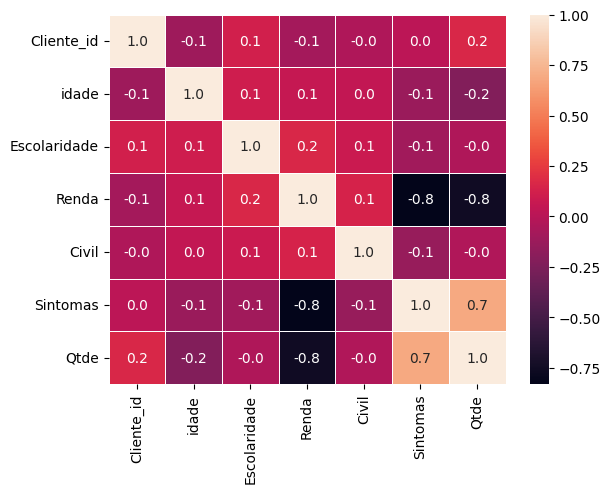

In [437]:
sns.heatmap(Dados.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


# **3.4 - Gráficos de linhas**

<Axes: title={'center': 'Sintomas X Renda'}, xlabel='Renda', ylabel='Sintomas'>

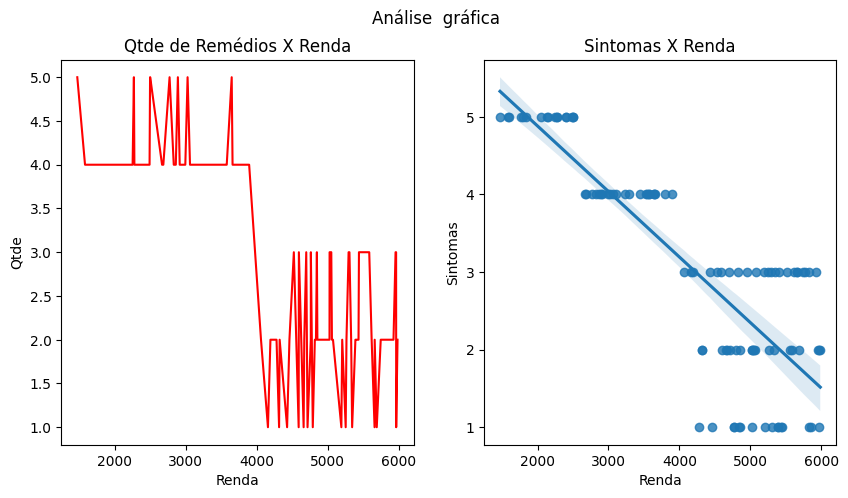

In [438]:

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle("Análise  gráfica")
axes[0].set_title("Qtde de Remédios X Renda")
axes[1].set_title("Sintomas X Renda")
sns.lineplot(data = Dados, x= 'Renda', y='Qtde', color = "red",ax=axes[0])
sns.regplot( data= Dados, x = "Renda", y= "Sintomas",ax=axes[1])

# **3.5 - Análise de remédios - Histograma**

In [439]:
col_remedios = Dados['Remedios']
col_remedios = pd.DataFrame(col_remedios)

In [440]:
col_remedios.head(10)

,Remedios
0,Azitromicina Cefalexina Losartana Alprazolam
1,Azitromicina Cefalexina Losartana
2,Azitromicina
3,Azitromicina Cefalexina Losartana Alprazolam
4,Azitromicina Cefalexina
5,Azitromicina
6,Azitromicina Cefalexina Losartana Alprazolam
7,Azitromicina Cefalexina
8,Azitromicina Cefalexina
9,Azitromicina Cefalexina Losartana Alprazolam


In [441]:
#Contagem dos remédios

Azitromicina = col_remedios.apply(lambda x:x.str.contains('Azitromicina').sum()).sum()
Cefalexina = col_remedios.apply(lambda x:x.str.contains('Cefalexina').sum()).sum()
Losartana = col_remedios.apply(lambda x:x.str.contains('Losartana').sum()).sum()
Alprazolam = col_remedios.apply(lambda x:x.str.contains('Alprazolam').sum()).sum()
Sinvastatina = col_remedios.apply(lambda x:x.str.contains('Sinvastatina').sum()).sum()

In [442]:
#Criando um Dataframe
Estats_remedios = pd.DataFrame({
    'Remedio':['Azitromicina','Cefalexina','Losartana','Alprazolam','Sinvastatina'],
    'Total':[Azitromicina,Cefalexina,Losartana,Alprazolam,Sinvastatina]
})

In [443]:
Estats_remedios.convert_dtypes()


,Remedio,Total
0,Azitromicina,100
1,Cefalexina,87
2,Losartana,57
3,Alprazolam,40
4,Sinvastatina,9


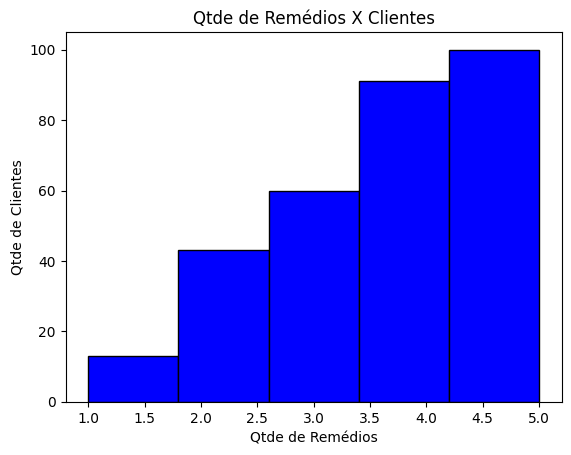

In [473]:
plt.hist(Dados['Qtde'], bins=5, color='blue', edgecolor='black',cumulative=True )
plt.title('Qtde de Remédios X Clientes')
plt.xlabel('Qtde de Remédios')
plt.ylabel('Qtde de Clientes')
plt.show()



# **4 - Análise de um cliente**

In [481]:
#Carregamendo do Google drive para leitura dos Datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [479]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# **1 - Carregamento dos dados e Tratamento**

In [475]:
tab_comportamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_comportamentos.xlsx')
tab_fraldas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_fraldas.xlsx')
tab_medicamentos_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XP_PA/Datasets/registro_medicamentos.xlsx')

In [482]:
tab_medicamentos_xls.head(10)

,DATA,m_1,m_2,m_3,m_4
0,2023-01-02,1,1,0,1
1,2023-01-03,1,1,0,1
2,2023-01-04,1,1,0,1
3,2023-01-05,1,1,0,1
4,2023-01-06,1,1,0,1
5,2023-01-07,1,1,0,1
6,2023-01-08,1,1,0,1
7,2023-01-09,1,1,0,1
8,2023-01-10,1,1,0,1
9,2023-01-11,1,1,0,1


In [483]:
#Excluindo as colunas desnecessárias

#tab_medicamentos_xls = tab_medicamentos_xls.drop(columns=['Unnamed: 5', 'Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])
#tab_medicamentos_xls.head(10)

KeyError: ignored

In [484]:
#Tratando a coluna DATA das tabelas para posteriormente,
#concatenar e formar uma base de dados só.


tab_comportamentos_xls["DATA"]= pd.to_datetime(tab_comportamentos_xls["DATA"])
tab_comportamentos_xls["DATA"].dt.strftime('%Y-%m-%d')

tab_fraldas["DATA"]= pd.to_datetime(tab_fraldas["DATA"])
tab_comportamentos_xls["DATA"].dt.strftime('%Y-%m-%d')


0      2023-01-02
1      2023-01-03
2      2023-01-04
3      2023-01-05
4      2023-01-06
          ...    
462    2024-04-08
463    2024-04-09
464    2024-04-10
465    2024-04-11
466    2024-04-12
Name: DATA, Length: 467, dtype: object

# **1.1 - Unindo as tabelas.**

In [485]:

df_a = pd.merge(tab_comportamentos_xls, tab_fraldas, on=['DATA'], how='inner')
df_a

,DATA,c_a,f_1,f_2
0,2023-01-02,1,4,1
1,2023-01-03,1,3,1
2,2023-01-04,1,3,1
3,2023-01-05,0,3,1
4,2023-01-06,0,4,1
...,...,...,...,...
462,2024-04-08,0,5,1
463,2024-04-09,0,5,1
464,2024-04-10,0,4,1
465,2024-04-11,0,3,1


In [486]:
Dados = pd.merge(df_a, tab_medicamentos_xls, on=['DATA'], how='inner')
Dados.head(10)

,DATA,c_a,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,3,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,3,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
5,2023-01-07,1,4,1,1,1,0,1
6,2023-01-08,0,3,1,1,1,0,1
7,2023-01-09,0,4,1,1,1,0,1
8,2023-01-10,1,4,1,1,1,0,1
9,2023-01-11,0,3,1,1,1,0,1


In [487]:
#Renomeando as colunas
Dados.columns=['Mes',	'Anormal','Diaria',	'Noturna',	'm_1',	'm_2',	'm_3',	'm_4']

In [ ]:
Dados

,Mes,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
0,2023-01-02,1,4,1,1,1,0,1
1,2023-01-03,1,3,1,1,1,0,1
2,2023-01-04,1,3,1,1,1,0,1
3,2023-01-05,0,3,1,1,1,0,1
4,2023-01-06,0,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...
462,2024-04-08,0,5,1,1,1,0,1
463,2024-04-09,0,5,1,1,1,0,1
464,2024-04-10,0,4,1,1,1,0,1
465,2024-04-11,0,3,1,1,1,0,1


# **1.2 - Tratando a coluna Mês**

In [ ]:
#Indexando
Dados.index = Dados['Mes']

In [ ]:
#Após o index, dropando a coluna duplicada
Dados = Dados.drop(columns=['Mes'])

In [ ]:
#Modificando o DF
Df = Dados.groupby(pd.Grouper(freq='M')).sum()

#Criando um Df só com as médias para qualquer utilidade.
Df_media = Dados.groupby(pd.Grouper(freq='M')).mean()

In [ ]:
#Verificando
Df.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,
2023-01-31,8,107,30,30,30,0,30
2023-02-28,0,100,28,28,28,0,28
2023-03-31,5,109,31,31,31,0,31
2023-04-30,6,105,30,30,30,0,30
2023-05-31,7,103,31,31,31,0,31
2023-06-30,7,104,30,30,30,0,30
2023-07-31,8,109,31,31,31,0,31
2023-08-31,0,114,31,31,31,0,31
2023-09-30,12,108,30,30,30,0,30


In [ ]:

Df_media.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,
2023-01-31,0.266667,3.566667,1.000000,1.000000,1.0,0.000000,1.000000
2023-02-28,0.000000,3.571429,1.000000,1.000000,1.0,0.000000,1.000000
2023-03-31,0.161290,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
2023-04-30,0.200000,3.500000,1.000000,1.000000,1.0,0.000000,1.000000
2023-05-31,0.225806,3.322581,1.000000,1.000000,1.0,0.000000,1.000000
2023-06-30,0.233333,3.466667,1.000000,1.000000,1.0,0.000000,1.000000
2023-07-31,0.258065,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
2023-08-31,0.000000,3.677419,1.000000,1.000000,1.0,0.000000,1.000000
2023-09-30,0.400000,3.600000,1.000000,1.000000,1.0,0.000000,1.000000


# **1.3 - Modificações na coluna Mês: de Data completa para somente o Mês**

In [ ]:
#Criando uma lista com meses

Meses = ['Jan23','Fev23','Mar23','Abr23','Mai23','Jun23','Jul23','Ago23','Set23','Out23','Nov23','Dez23','Jan24','Fev24','Mar24','Abr24']

In [ ]:
#Inserindo a nova coluna com os Meses
Df.insert(0,'Meses',Meses,True)
Df_media.insert(0,'Meses', Meses, True)

In [ ]:
Df.head(20)

,Meses,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Mes,,,,,,,,
2023-01-31,Jan23,8,107,30,30,30,0,30
2023-02-28,Fev23,0,100,28,28,28,0,28
2023-03-31,Mar23,5,109,31,31,31,0,31
2023-04-30,Abr23,6,105,30,30,30,0,30
2023-05-31,Mai23,7,103,31,31,31,0,31
2023-06-30,Jun23,7,104,30,30,30,0,30
2023-07-31,Jul23,8,109,31,31,31,0,31
2023-08-31,Ago23,0,114,31,31,31,0,31
2023-09-30,Set23,12,108,30,30,30,0,30


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2023-01-31 to 2024-04-30
Freq: M
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Meses    16 non-null     object
 1   Anormal  16 non-null     int64 
 2   f_1      16 non-null     int64 
 3   f_2      16 non-null     int64 
 4   m_1      16 non-null     int64 
 5   m_2      16 non-null     int64 
 6   m_3      16 non-null     int64 
 7   m_4      16 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


In [ ]:
#Removendo o a coluna INDEX
Df = Df.reset_index(drop=True)
Df_media = Df_media.reset_index(drop=True)


In [ ]:
Df = Df.set_index('Meses')
Df_media = Df_media.set_index('Meses')


# **1.4 - Prontificando o DF para estudos**

In [ ]:
#Verificando
Df.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Fev23,0,100,28,28,28,0,28
Mar23,5,109,31,31,31,0,31
Abr23,6,105,30,30,30,0,30
Mai23,7,103,31,31,31,0,31
Jun23,7,104,30,30,30,0,30
Jul23,8,109,31,31,31,0,31
Ago23,0,114,31,31,31,0,31
Set23,12,108,30,30,30,0,30


In [ ]:
Df_media.head(20)

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,0.266667,3.566667,1.000000,1.000000,1.0,0.000000,1.000000
Fev23,0.000000,3.571429,1.000000,1.000000,1.0,0.000000,1.000000
Mar23,0.161290,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
Abr23,0.200000,3.500000,1.000000,1.000000,1.0,0.000000,1.000000
Mai23,0.225806,3.322581,1.000000,1.000000,1.0,0.000000,1.000000
Jun23,0.233333,3.466667,1.000000,1.000000,1.0,0.000000,1.000000
Jul23,0.258065,3.516129,1.000000,1.000000,1.0,0.000000,1.000000
Ago23,0.000000,3.677419,1.000000,1.000000,1.0,0.000000,1.000000
Set23,0.400000,3.600000,1.000000,1.000000,1.0,0.000000,1.000000


In [ ]:
Df_media.describe()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
count,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000
mean,0.237527,3.669009,1.068548,1.025654,1.0,0.030242,0.917895
std,0.146522,0.277866,0.193145,0.249878,0.0,0.120968,0.236539
min,0.000000,3.322581,1.000000,0.548387,1.0,0.000000,0.137931
25%,0.185484,3.512097,1.000000,1.000000,1.0,0.000000,1.000000
50%,0.229570,3.557527,1.000000,1.000000,1.0,0.000000,1.000000
75%,0.280645,3.749444,1.000000,1.000000,1.0,0.000000,1.000000
max,0.548387,4.258065,1.677419,1.862069,1.0,0.483871,1.000000


# **2 - Buscando Dados correlatos**

# *2.1 - Análise de Correlação*

<Axes: >

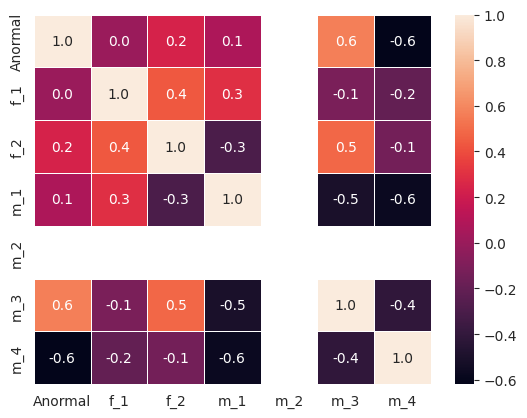

In [ ]:
#teste = Dados.corr()
sns.heatmap(Df_media.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)


# *Olhando mais de perto as variáveis com correlação 0.4, 0.5 e 0.6, as correlações entre o Comportamento Anormal, qtde fraldas do tipo 1, medicamento tipo 1 e medicamento tipo 3, chamam a atenção e veremos algum insight nos gráficos*

In [ ]:
Df_media_b = Df_media.drop(columns=['m_2','m_4'])
Df_media_b.head(10)

,Anormal,f_1,f_2,m_1,m_3
Meses,,,,,
Jan23,0.266667,3.566667,1.000000,1.000000,0.000000
Fev23,0.000000,3.571429,1.000000,1.000000,0.000000
Mar23,0.161290,3.516129,1.000000,1.000000,0.000000
Abr23,0.200000,3.500000,1.000000,1.000000,0.000000
Mai23,0.225806,3.322581,1.000000,1.000000,0.000000
Jun23,0.233333,3.466667,1.000000,1.000000,0.000000
Jul23,0.258065,3.516129,1.000000,1.000000,0.000000
Ago23,0.000000,3.677419,1.000000,1.000000,0.000000
Set23,0.400000,3.600000,1.000000,1.000000,0.000000


<Axes: >

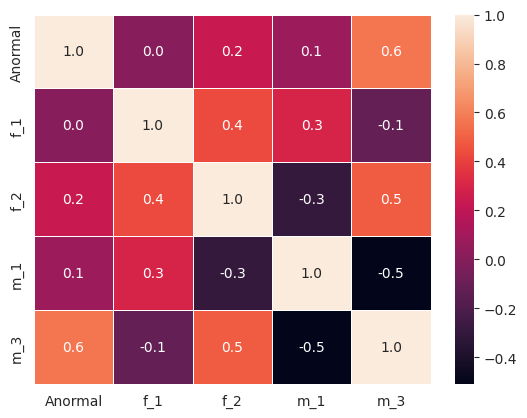

In [ ]:
#Mapa de calor
sns.heatmap(Df_media_b.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)

# *2.2 - Análise com gráfico de linhas*

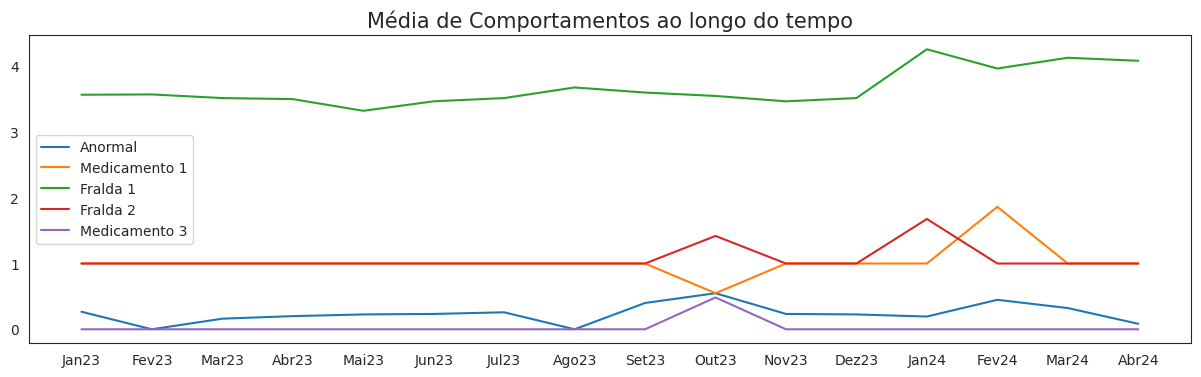

In [ ]:
#Buscando alterações de comportamento ao longo do tempo.

Dados_media_grafico = pd.DataFrame(Df_media_b.reset_index())

plt.subplots(figsize=(15,4))
plt.title("Média de Comportamentos ao longo do tempo", fontsize=15)
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['Anormal'],label='Anormal')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['m_1'],label='Medicamento 1')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['f_1'],label='Fralda 1')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['f_2'],label='Fralda 2')
plt.plot(Dados_media_grafico['Meses'], Dados_media_grafico['m_3'],label='Medicamento 3')

plt.legend()
plt.show()

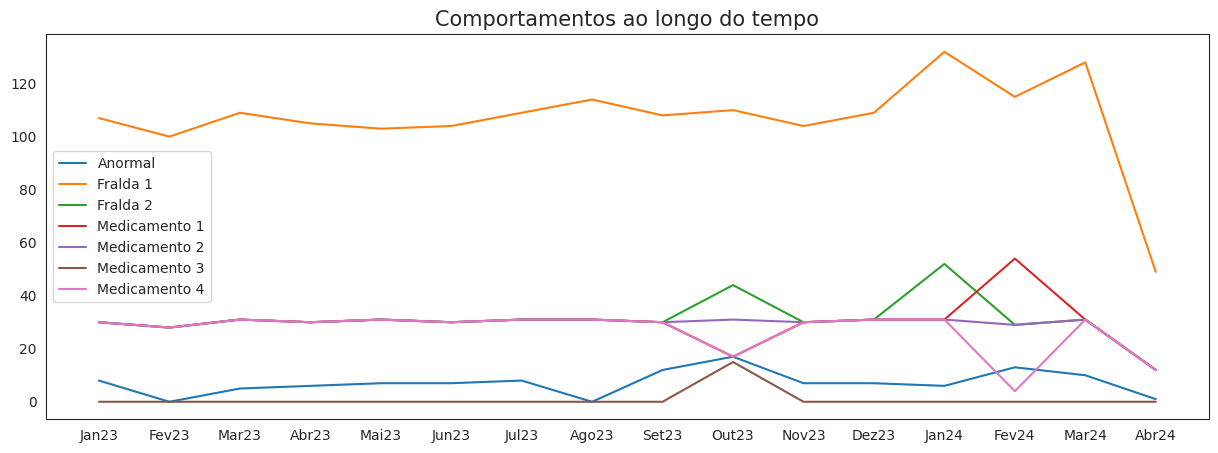

In [ ]:
#Buscando alterações de comportamento ao longo do tempo.

Dados_media_grafico = pd.DataFrame(Df_media_b.reset_index())

plt.subplots(figsize=(15,5))
plt.title("Comportamentos ao longo do tempo", fontsize=15)
plt.plot(Dados_media_grafico['Meses'], Df['Anormal'],label='Anormal')
plt.plot(Dados_media_grafico['Meses'], Df['f_1'],label='Fralda 1')
plt.plot(Dados_media_grafico['Meses'], Df['f_2'],label='Fralda 2')
plt.plot(Dados_media_grafico['Meses'], Df['m_1'],label='Medicamento 1')
plt.plot(Dados_media_grafico['Meses'], Df['m_2'],label='Medicamento 2')
plt.plot(Dados_media_grafico['Meses'], Df['m_3'],label='Medicamento 3')
plt.plot(Dados_media_grafico['Meses'], Df['m_4'],label='Medicamento 4')
plt.legend()
plt.show()

# *2.2.1 - Com o gráfico de linhas expondo alguns insights, Aprofunda-se com o mapa de calor.*

In [ ]:
#Puxando o Dataframe com o somatório por mês.
Df.head()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Fev23,0,100,28,28,28,0,28
Mar23,5,109,31,31,31,0,31
Abr23,6,105,30,30,30,0,30
Mai23,7,103,31,31,31,0,31


<Axes: >

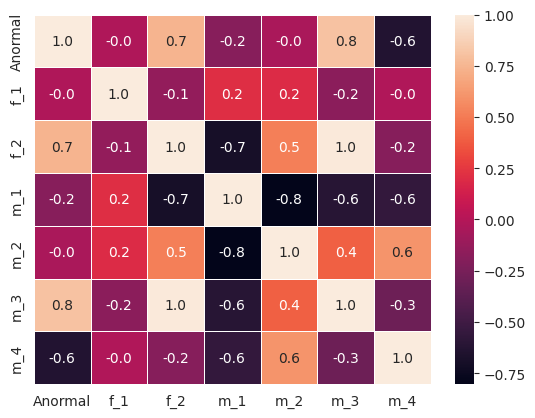

In [ ]:
 #Aplicando um filtro somente com os meses que possuem ANOMALIAS ACIMA da MEDIANA
 #da sua coluna.

 Anormal_filtro = Df.loc[(Df['Anormal']) > Df['Anormal'].median()]

 #Mapa de calor
 sns.heatmap(Anormal_filtro.corr(method='pearson'), annot=True, fmt=".1f", linewidths=.6)

In [ ]:
Anormal_filtro.describe()

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.333333,112.833333,32.500000,32.166667,30.333333,2.500000,23.833333
std,3.444803,7.935154,5.683309,11.990274,0.816497,6.123724,11.125047
min,8.000000,107.000000,29.000000,17.000000,29.000000,0.000000,4.000000
25%,8.500000,108.250000,30.000000,30.000000,30.000000,0.000000,20.250000
50%,11.000000,109.500000,30.500000,30.500000,30.500000,0.000000,30.000000
75%,12.750000,113.750000,31.000000,31.000000,31.000000,0.000000,30.750000
max,17.000000,128.000000,44.000000,54.000000,31.000000,15.000000,31.000000


In [ ]:
Anormal_filtro

,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Jan23,8,107,30,30,30,0,30
Jul23,8,109,31,31,31,0,31
Set23,12,108,30,30,30,0,30
Out23,17,110,44,17,31,15,17
Fev24,13,115,29,54,29,0,4
Mar24,10,128,31,31,31,0,31


# *2.2.2 - Com filtro aplicado, Qual o mês com maior anormalidade ?*

In [ ]:
#Anormal

Anormal_filtro.loc[Anormal_filtro['Anormal'] == Anormal_filtro['Anormal'].max()]


,Anormal,f_1,f_2,m_1,m_2,m_3,m_4
Meses,,,,,,,
Out23,17,110,44,17,31,15,17
